In [ ]:
#Interval Increase
# More Features

In [118]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

stock_data = yf.download('SPY', start='2012-01-01', end='2023-02-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NIFTY_50.NS: Period 'max' is invalid, must be one of ['1d', '5d']


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

Text(0, 0.5, 'Prices ($)')

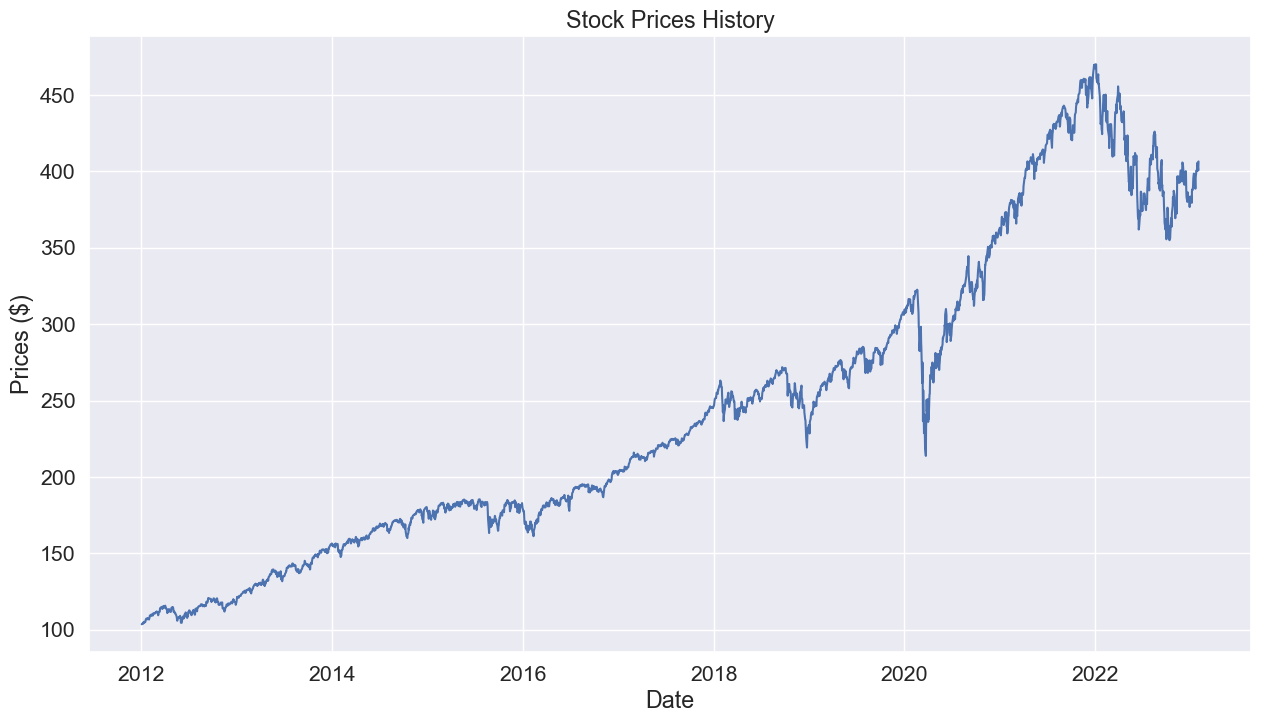

In [41]:

plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [42]:
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [43]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [44]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [45]:

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
2171/2171 [==============================] - 37s 16ms/step - loss: 5.4986e-04
Epoch 2/3
2171/2171 [==============================] - 44s 20ms/step - loss: 2.6986e-04
Epoch 3/3
2171/2171 [==============================] - 45s 21ms/step - loss: 2.1526e-04


In [46]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('RMSE:', rmse)
print('% Error', 100 * rmse / predictions.max())
x_test

18/18 [==============================] - 1s 18ms/step
RMSE: 3.8426968422141496
% Error 0.8161419008530724


array([[[0.5988693 ],
        [0.60186746],
        [0.60529401],
        ...,
        [0.64835385],
        [0.64686906],
        [0.65437886]],

       [[0.60186746],
        [0.60529401],
        [0.6151167 ],
        ...,
        [0.64686906],
        [0.65437886],
        [0.64449901]],

       [[0.60529401],
        [0.6151167 ],
        [0.61854316],
        ...,
        [0.65437886],
        [0.64449901],
        [0.6584621 ]],

       ...,

       [[0.73872819],
        [0.7339025 ],
        [0.70634762],
        ...,
        [0.77867571],
        [0.779104  ],
        [0.79166788]],

       [[0.7339025 ],
        [0.70634762],
        [0.69532571],
        ...,
        [0.779104  ],
        [0.79166788],
        [0.7943234 ]],

       [[0.70634762],
        [0.69532571],
        [0.71057369],
        ...,
        [0.79166788],
        [0.7943234 ],
        [0.77978928]]])

C:\Users\gupta\AppData\Local\Temp\ipykernel_26012\2654089588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


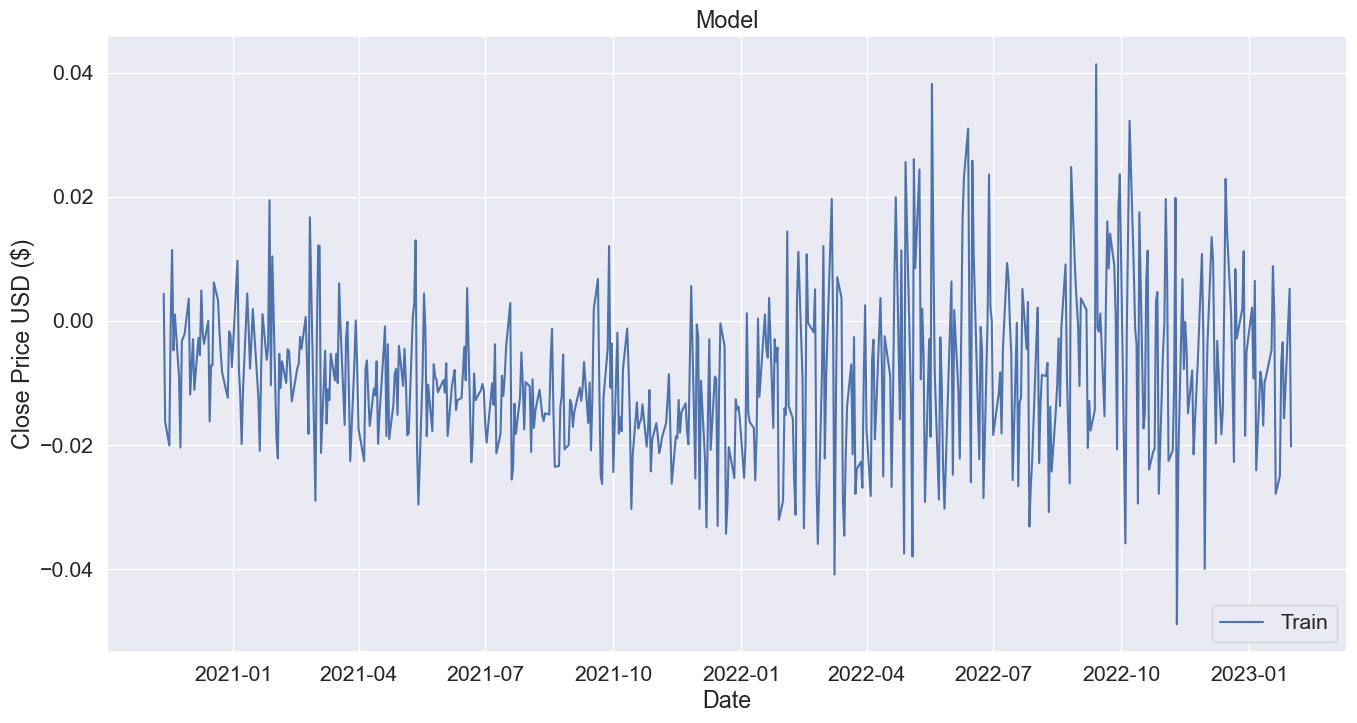

Close  Predictions
Date                               
2020-11-12  353.209991   354.749908
2020-11-13  358.100006   352.279114
2020-11-16  362.570007   355.285278
2020-11-17  360.619995   360.404388
2020-11-18  356.279999   360.350220
...                ...          ...
2023-01-25  400.350006   398.969177
2023-01-26  404.750000   398.401459
2023-01-27  405.679993   401.243958
2023-01-30  400.589996   402.658142
2023-01-31  406.480011   398.250580

[557 rows x 2 columns]

In [116]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
#plt.plot(train)
#plt.plot(validation[['Close', 'Predictions']])
plt.plot((validation['Predictions'] - validation['Close']) / validation['Close'])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
validation[['Close', 'Predictions']]

In [63]:
suc = 0
suc1 = 0
suc2 = 0
tot = 0
for i in range(1, len(predictions)):
    #print(predictions[i][0])
    #print(i, predictions[i][0] - y_test[i], y_test[i] - y_test[i-1] > 0)
    tot += 1
    if predictions[i][0]  > .90 * y_test[i] and predictions[i][0] < 1.10 * y_test[i]:
        suc += 1
print(suc1)
print(suc2)
print(suc)
print(tot)
for i in range(10):
    print(predictions[i][0], y_test[i])
y_test
predictions[1][0]
#print('accuracy %:', suc * 100 / tot)

validation_array = [[0, 0], [0, 0]]
total_vals_1 = 0
for i in range(1, len(predictions)):
    #print(predictions[i][0])
    #print(i, predictions[i][0] - y_test[i], y_test[i] - y_test[i-1] > 0)
    total_vals_1 += 1
    if predictions[i][0] - predictions[i-1][0] >= 0:
        if y_test[i] - y_test[i-1] >= -1 * .02 * y_test[i]:
            validation_array[1][1] += 1
        else:
            validation_array[1][0] += 1
    else:
        if y_test[i] - y_test[i-1] <= .02 * y_test[i]:
            validation_array[0][0] += 1
        else:
            validation_array[0][1] += 1
print('% Accuracy', 100 * (validation_array[0][0] +  validation_array[1][1])/total_vals_1, '%') 
validation_array

# Used on Close Column: % Accuracy 89.18032786885246 %

0
0
556
556
354.7499 353.2099914550781
352.2791 358.1000061035156
355.28528 362.57000732421875
360.4044 360.6199951171875
360.35022 356.2799987792969
356.077 357.7799987792969
355.6951 355.3299865722656
354.21494 357.4599914550781
355.8029 363.2200012207031
361.4809 362.6600036621094
% Accuracy 94.06474820143885 %


[[250, 18], [15, 273]]

In [64]:
validation

Close  Predictions
Date                               
2020-11-12  353.209991   354.749908
2020-11-13  358.100006   352.279114
2020-11-16  362.570007   355.285278
2020-11-17  360.619995   360.404388
2020-11-18  356.279999   360.350220
...                ...          ...
2023-01-25  400.350006   398.969177
2023-01-26  404.750000   398.401459
2023-01-27  405.679993   401.243958
2023-01-30  400.589996   402.658142
2023-01-31  406.480011   398.250580

[557 rows x 2 columns]

In [112]:
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)
acc = []
total_vals_1 = 0
suc = 0

for i in validation.loc['2020':].index.tolist():
    try:
        try_block =  validation['Predictions'][i - timedelta(days=1)]
    except:
        continue
    total_vals_1 += 1
    if validation['Predictions'][i] - validation['Predictions'][i - timedelta(days=1)] >= 0:
        if validation['Close'][i]  - validation['Close'][i - timedelta(days=1)] >= -1 * .02 * validation['Close'][i]:
            suc += 1
    else:
        if validation['Close'][i]  - validation['Close'][i - timedelta(days=1)] <= .02 * validation['Close'][i]:
            suc += 1
print('% Accuracy 2020', 100 * (suc)/total_vals_1, '%') 


% Accuracy 2020 93.59267734553775 %


In [109]:
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)
acc = []
total_vals_1 = 0
suc = 0

for i in validation.loc['2021':].index.tolist():
    try:
        try_block =  validation['Predictions'][i - timedelta(days=1)]
    except:
        continue
    total_vals_1 += 1
    if validation['Predictions'][i] - validation['Predictions'][i - timedelta(days=1)] >= 0:
        if validation['Close'][i]  - validation['Close'][i - timedelta(days=1)] >= -1 * .02 * validation['Close'][i]:
            suc += 1
    else:
        if validation['Close'][i]  - validation['Close'][i - timedelta(days=1)] <= .02 * validation['Close'][i]:
            suc += 1
print('% Accuracy 2021', 100 * (suc)/total_vals_1, '%') 


% Accuracy 2021 93.20388349514563 %


In [110]:
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)
acc = []
total_vals_1 = 0
suc = 0

for i in validation.loc['2022':].index.tolist():
    try:
        try_block =  validation['Predictions'][i - timedelta(days=1)]
    except:
        continue
    total_vals_1 += 1
    if validation['Predictions'][i] - validation['Predictions'][i - timedelta(days=1)] >= 0:
        if validation['Close'][i]  - validation['Close'][i - timedelta(days=1)] >= -1 * .02 * validation['Close'][i]:
            suc += 1
    else:
        if validation['Close'][i]  - validation['Close'][i - timedelta(days=1)] <= .02 * validation['Close'][i]:
            suc += 1
print('% Accuracy 2022', 100 * (suc)/total_vals_1, '%') 


% Accuracy 2022 87.79342723004694 %


In [111]:
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)
acc = []
total_vals_1 = 0
suc = 0

for i in validation.loc['2023':].index.tolist():
    try:
        try_block =  validation['Predictions'][i - timedelta(days=1)]
    except:
        continue
    total_vals_1 += 1
    if validation['Predictions'][i] - validation['Predictions'][i - timedelta(days=1)] >= 0:
        if validation['Close'][i]  - validation['Close'][i - timedelta(days=1)] >= -1 * .02 * validation['Close'][i]:
            suc += 1
    else:
        if validation['Close'][i]  - validation['Close'][i - timedelta(days=1)] <= .02 * validation['Close'][i]:
            suc += 1
print('% Accuracy 2023', 100 * (suc)/total_vals_1, '%') 


% Accuracy 2023 93.33333333333333 %


In [50]:
suc = 0
suc1 = 0
suc2 = 0
tot = 0
for i in range(1, len(predictions)):
    #print(predictions[i][0])
    #print(i, predictions[i][0] - y_test[i], y_test[i] - y_test[i-1] > 0)
    tot += 1
    if predictions[i][0]  > .93 * y_test[i] and predictions[i][0] < 1.03 * y_test[i]:
        suc += 1

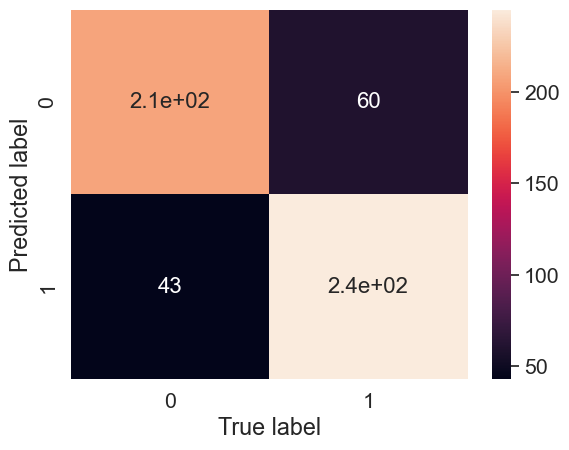

In [51]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(validation_array, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.show()

In [52]:
max_inaccuracy = 0
for i in range(1, len(predictions)):
    max_inaccuracy = max(max_inaccuracy, abs(predictions[i][0] - y_test[i]) * 100 / y_test[i])
max_inaccuracy

4.8897635713104926

In [53]:
x_test[0]

array([[0.5988693 ],
       [0.60186746],
       [0.60529401],
       [0.6151167 ],
       [0.61854316],
       [0.62839443],
       [0.6305645 ],
       [0.63698921],
       [0.63336285],
       [0.64275724],
       [0.65731994],
       [0.62216961],
       [0.61411728],
       [0.58739041],
       [0.60617919],
       [0.58933217],
       [0.58981755],
       [0.60238142],
       [0.60726427],
       [0.60340942],
       [0.59490021],
       [0.58008052],
       [0.56957256],
       [0.5790811 ],
       [0.55720859],
       [0.55966422],
       [0.57459814],
       [0.59018877],
       [0.58499186],
       [0.5921876 ],
       [0.59832676],
       [0.58918935],
       [0.60609353],
       [0.59230176],
       [0.60894896],
       [0.61757233],
       [0.62633852],
       [0.64227177],
       [0.63570432],
       [0.62942234],
       [0.62819453],
       [0.62759491],
       [0.61251825],
       [0.61643017],
       [0.61457416],
       [0.61994229],
       [0.62328318],
       [0.605

In [113]:
#Round off Values
#Creating Boxes
#Take Adjusted Close
#Year-based Accuracy
#Multivariate LSTM
v1 = []
v1.append(x_test[len(x_test) - 1])
pred = model.predict(v1)
pred
scaler.inverse_transform(pred)

2/2 [==============================] - 0s 3ms/step


array([[335.57098],
       [332.4899 ],
       [336.75433],
       [339.63727],
       [341.2818 ],
       [334.97977],
       [351.50775],
       [354.60138],
       [351.8556 ],
       [354.5851 ],
       [352.12265],
       [351.14377],
       [352.5921 ],
       [351.42682],
       [355.7288 ],
       [357.77515],
       [357.70197],
       [352.495  ],
       [351.94464],
       [362.05627],
       [361.81177],
       [361.42877],
       [355.47723],
       [350.81223],
       [350.27066],
       [352.76215],
       [350.36765],
       [354.9581 ],
       [357.4095 ],
       [355.32312],
       [347.42078],
       [342.30164],
       [339.6934 ],
       [340.11038],
       [344.68167],
       [340.25473],
       [342.01248],
       [340.80026],
       [337.00235],
       [342.43823],
       [341.62695],
       [340.33493],
       [342.69534],
       [339.1804 ],
       [346.17136],
       [345.99414],
       [348.18716],
       [352.1793 ],
       [353.34525],
       [354.59323],


In [55]:
stock = ['^RUT', '^GSPC', '^DJI', '^IXIC' ]
data = yf.download(stock, start='2016-01-01', end='2022-02-01')
print(data.head())

[*********************100%***********************]  4 of 4 completed
               Adj Close                                                Close  \
                    ^DJI        ^GSPC        ^IXIC         ^RUT          ^DJI   
Date                                                                            
2016-01-04  17148.939453  2012.660034  4903.089844  1108.619995  17148.939453   
2016-01-05  17158.660156  2016.709961  4891.430176  1110.439941  17158.660156   
2016-01-06  16906.509766  1990.260010  4835.759766  1094.369995  16906.509766   
2016-01-07  16514.099609  1943.089966  4689.430176  1064.569946  16514.099609   
2016-01-08  16346.450195  1922.030029  4643.629883  1046.199951  16346.450195   

                                                           High               \
                  ^GSPC        ^IXIC         ^RUT          ^DJI        ^GSPC   
Date                                                                           
2016-01-04  2012.660034  4903.089844  1108

In [56]:
X = data.copy()
print(X.shape)
print(X.tail())
X = X['Close']
X

(1531, 24)
               Adj Close                                          \
                    ^DJI        ^GSPC         ^IXIC         ^RUT   
Date                                                               
2022-01-25  34297.730469  4356.450195  13539.290039  2004.030029   
2022-01-26  34168.089844  4349.930176  13542.120117  1976.459961   
2022-01-27  34160.781250  4326.509766  13352.780273  1931.290039   
2022-01-28  34725.468750  4431.850098  13770.570312  1968.510010   
2022-01-31  35131.859375  4515.549805  14239.879883  2028.449951   

                   Close                                          \
                    ^DJI        ^GSPC         ^IXIC         ^RUT   
Date                                                               
2022-01-25  34297.730469  4356.450195  13539.290039  2004.030029   
2022-01-26  34168.089844  4349.930176  13542.120117  1976.459961   
2022-01-27  34160.781250  4326.509766  13352.780273  1931.290039   
2022-01-28  34725.468750  4431.85009

^DJI        ^GSPC         ^IXIC         ^RUT
Date                                                            
2016-01-04  17148.939453  2012.660034   4903.089844  1108.619995
2016-01-05  17158.660156  2016.709961   4891.430176  1110.439941
2016-01-06  16906.509766  1990.260010   4835.759766  1094.369995
2016-01-07  16514.099609  1943.089966   4689.430176  1064.569946
2016-01-08  16346.450195  1922.030029   4643.629883  1046.199951
...                  ...          ...           ...          ...
2022-01-25  34297.730469  4356.450195  13539.290039  2004.030029
2022-01-26  34168.089844  4349.930176  13542.120117  1976.459961
2022-01-27  34160.781250  4326.509766  13352.780273  1931.290039
2022-01-28  34725.468750  4431.850098  13770.570312  1968.510010
2022-01-31  35131.859375  4515.549805  14239.879883  2028.449951

[1531 rows x 4 columns]

In [57]:
X.corr()

^DJI     ^GSPC     ^IXIC      ^RUT
^DJI   1.000000  0.978885  0.953727  0.942926
^GSPC  0.978885  1.000000  0.989728  0.938582
^IXIC  0.953727  0.989728  1.000000  0.918060
^RUT   0.942926  0.938582  0.918060  1.000000

In [58]:
split_ratio = 0.2
X = X.values # Convert to NumPy array
split = int(len(X) * (1-split_ratio))
train_set = X[: split]
test_set = X[split:]
print(train_set.shape, test_set.shape)

(1224, 4) (307, 4)


In [17]:
def supvervisedSeries(data, n, h):
  x, y = list (), list ()
  for i in range (len(data)-n-h+1):
    x.append(data[i:(i+n)])
    y.append(data[i+h+n-1])
  return np.array(x), np.array(y)
h = 1
n = 4
trainX, trainY = supvervisedSeries(train_set, n, h)
testX, testY = supvervisedSeries(test_set, n, h)
print("trainX: ", trainX.shape)
print("trainY: ", trainY.shape)
print("testX: ", testX.shape)
print("testY: ", testY.shape)

trainX:  (1220, 4, 4)
trainY:  (1220, 4)
testX:  (303, 4, 4)
testY:  (303, 4)


In [18]:
scalers = {}
for i in range (trainX.shape[2]):
  scalers[i] = MinMaxScaler()
  trainX[:, :, i] = scalers[i].fit_transform(trainX[:, :, i])
for i in range(testX.shape[2]):
  testX[:, :, i] = scalers[i].transform(testX[:, :, i])
# The target values are 2D arrays, which is easy to scale
scalerY = MinMaxScaler()
trainY = scalerY.fit_transform(trainY)
testY = scalerY.transform(testY)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import Sequential

ImportError: cannot import name 'Sequential' from 'tensorflow' (C:\Users\gupta\anaconda3\lib\site-packages\tensorflow\__init__.py)

In [ ]:
print(trainX.shape)
# Flatten input (to support multivariate input)
n_input = trainX.shape[1]
trainX = trainX.reshape((trainX.shape[0], n_input))
n_input = testX.shape[1]
testX = testX.reshape((testX.shape[0], n_input))
# Create multilayered FFNN model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=trainX.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(trainY.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
# Fit model
history = model.fit(trainX, trainY, epochs =60, verbose =1)
# Predict the test set
predictions = model.predict(testX)
